#Q1

In [226]:
import numpy as np, random
def set_seed(seed):
  np.random.seed(seed)
  random.seed(seed)
set_seed(810109203)

from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 2s 5ms/step


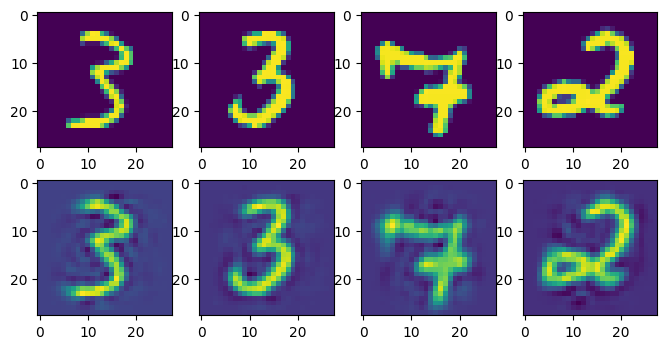

In [227]:
import matplotlib.pyplot as plt

indices = [323,3487,4654,8844]

plt.figure(figsize=(8, 4))
for i, index in enumerate(indices, 1):
    plt.subplot(2, 4, i)
    plt.imshow(test_images[index].reshape(28, 28))
    plt.subplot(2, 4, i + 4)
    plt.imshow(reconstructed_images[index].reshape(28, 28))

plt.show()

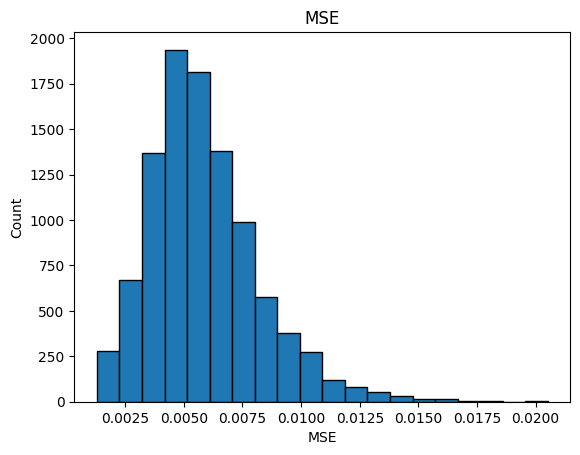

In [228]:
def mean_squared_error(original, reconstructed):
    return np.mean(np.square(original - reconstructed))

mse_values = [mean_squared_error(test_images[i], reconstructed_images[i]) for i in range(test_images.shape[0])]
plt.hist(mse_values, bins=20, edgecolor='black')
plt.title('MSE')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.show()

In [229]:
from scipy import stats
mean = sum(mse_values) / len(mse_values)
std = (sum((mse - mean) ** 2 for mse in mse_values) / len(mse_values)) ** 0.5

ks_statistic, p_value = stats.kstest(mse_values, cdf='norm', args=(mean, std))
print(p_value)

4.538721695605657e-43


#Q2

In [232]:
import matplotlib.pyplot as plt
import numpy as np

def linear_regression(x, y):
  n = len(x)
  a = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
  b = (np.sum(y) - a * np.sum(x)) / n
  y_new = a * x + b

  SS_res = np.sum((y - y_new)**2)
  SS_tot = np.sum((y - np.mean(y))**2)
  R_squ = 1 - (SS_res / SS_tot)

  plt.scatter(x, y)
  plt.plot(x, y_new, color='red')
  plt.title('Regression')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  print(f"R^2 = {R_squ}")

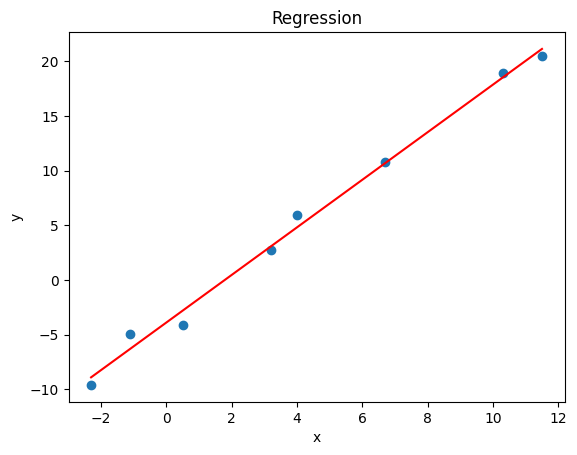

R^2 = 0.9931142293628097


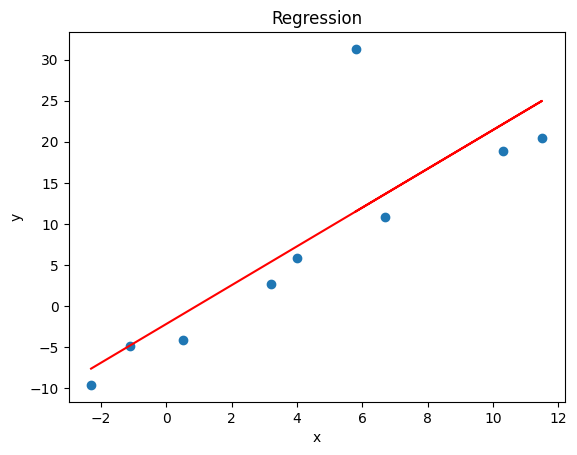

R^2 = 0.6943381680789323


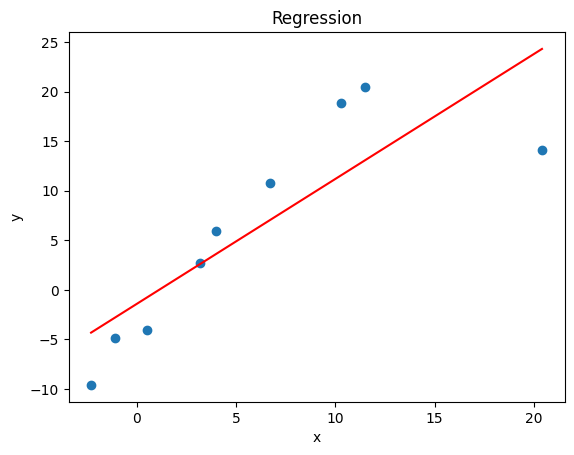

R^2 = 0.7069879724740985


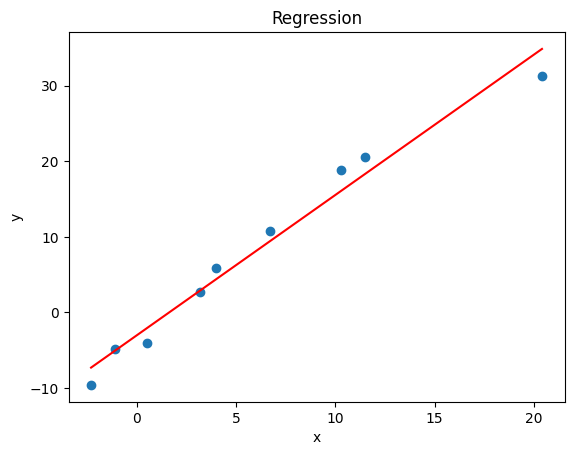

R^2 = 0.9738367949787371


In [231]:
x = np.array([-2.3, -1.1, 0.5, 3.2, 4, 6.7, 10.3, 11.5])
y = np.array([-9.6, -4.9, -4.1, 2.7, 5.9, 10.8, 18.9, 20.5])

linear_regression(x, y)
linear_regression(np.append(x, 5.8), np.append(y, 31.3))
linear_regression(np.append(x, 20.4), np.append(y, 14.1))
linear_regression(np.append(x, 20.4), np.append(y, 31.3))

#Q3

In [233]:
import pandas as pd

df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")
df.replace("N/A", np.nan, inplace=True)

df['dribbling'] = df['dribbling'].fillna(df['dribbling'].mean())
df['pace'] = df['pace'].fillna(df['pace'].mean())

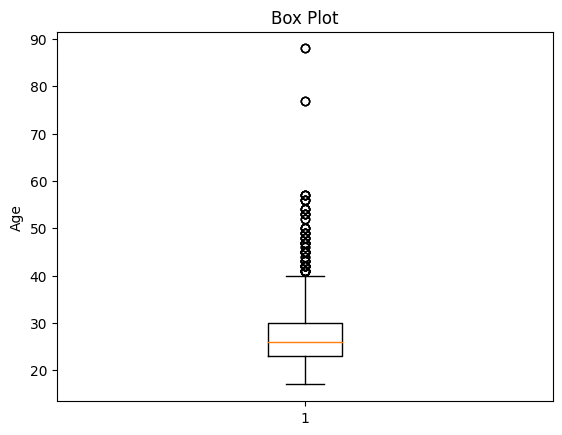

Min= 17.0
Q1= 23.0
Q2= 26.0
Q3= 30.0
Max= 88.0


In [234]:
plt.boxplot(df['age'])
plt.title('Box Plot')
plt.ylabel('Age')
plt.show()

print("Min=", df['age'].describe()['min'])
print("Q1=", df['age'].describe()['25%'])
print("Q2=", df['age'].describe()['50%'])
print("Q3=", df['age'].describe()['75%'])
print("Max=", df['age'].describe()['max'])

In [235]:
from scipy.stats import probplot
import scipy.stats as stats

def compare(n):
  sample = np.random.choice(df['weight'].dropna(), size=n)
  sample_mean = np.mean(sample)
  sample_std = np.var(sample)**(0.5)
  normal_distrb = np.random.normal(loc=sample_mean, scale=sample_std, size=n)
  print("mean=",sample_mean)
  print("std=",sample_std)

  plt.figure(figsize=(6, 6))
  probplot(sample, plot=plt)
  probplot(normal_distrb, plot=plt)
  plt.title('Q-Q')
  plt.xlabel('normal distrb')
  plt.ylabel('sample')
  plt.show()

  statistic, p_value = stats.shapiro(sample)
  print("p-value=",p_value)
  print(".")

mean= 75.21
std= 8.320210333879787


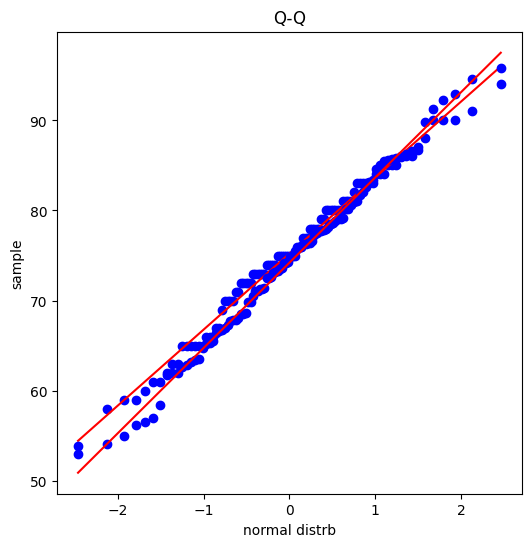

p-value= 0.5146815180778503
.
mean= 75.66
std= 6.926499837580306


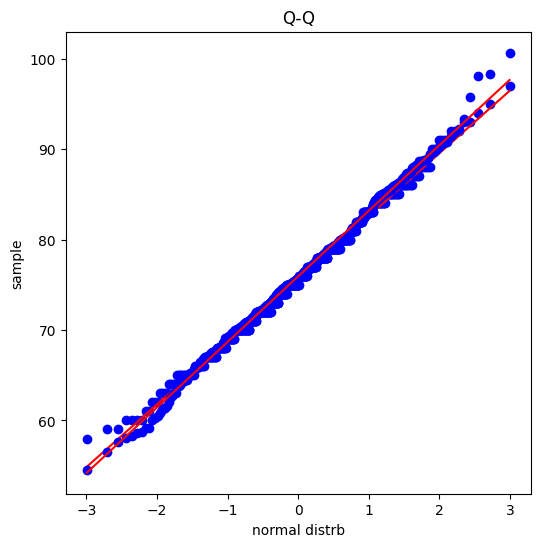

p-value= 0.09647864103317261
.
mean= 75.292
std= 6.872534903512677


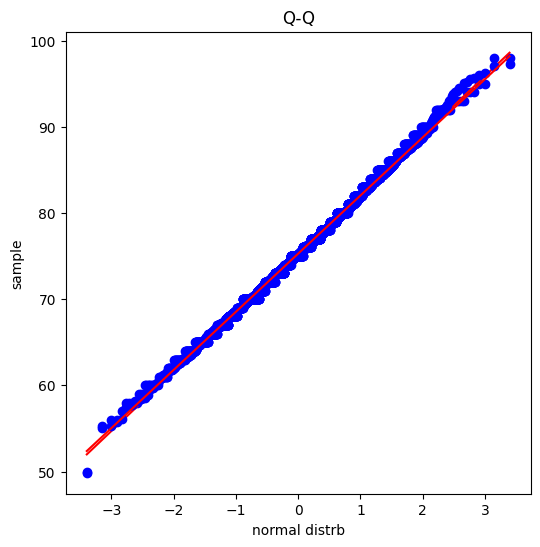

p-value= 3.124432259937748e-05
.


In [236]:
compare(100)
compare(500)
compare(2000)


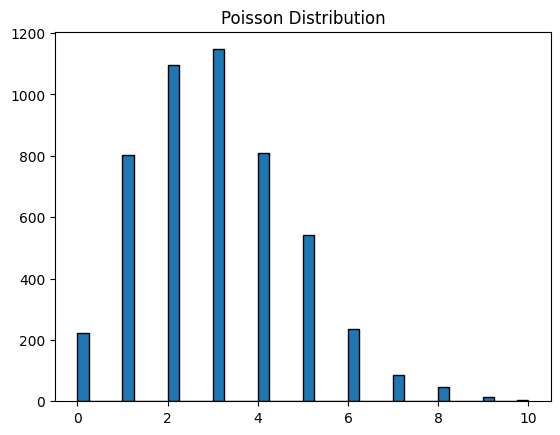

In [224]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.random.poisson(3, size=5000), bins=40, edgecolor='black')
plt.title('Poisson Distribution')
plt.show()

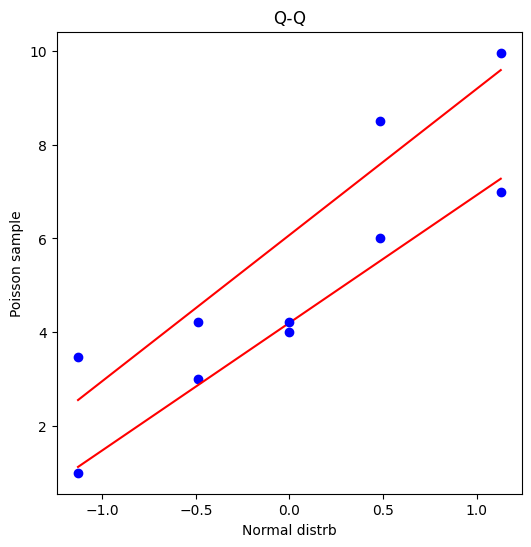

p-value= 0.898902952671051
.


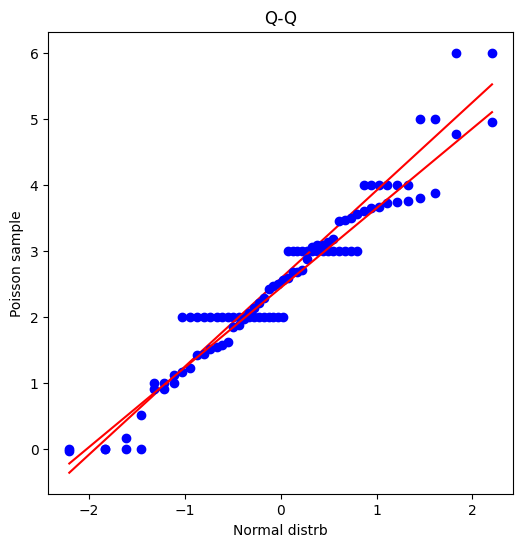

p-value= 0.002086555352434516
.


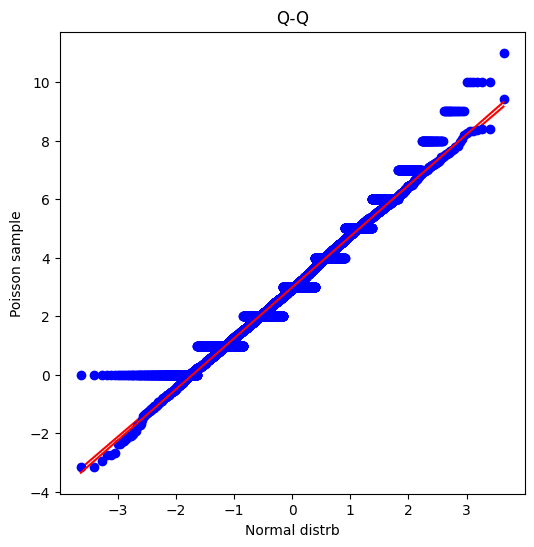

p-value= 4.402533654187887e-39
.


In [237]:
def Poisson_Normal_compare(n):
  poisson_sample = np.random.poisson(3, size=n)
  normal_distrb = np.random.normal(loc=np.mean(poisson_sample), scale=np.var(poisson_sample)**(0.5), size=n)

  plt.figure(figsize=(6, 6))
  probplot(poisson_sample, plot=plt)
  probplot(normal_distrb, plot=plt)
  plt.title('Q-Q')
  plt.xlabel('Normal distrb')
  plt.ylabel('Poisson sample')
  plt.show()

  statistic, p_value = stats.shapiro(poisson_sample)
  print("p-value=",p_value)
  print(".")

Poisson_Normal_compare(5)
Poisson_Normal_compare(50)
Poisson_Normal_compare(5000)